# 1. Import and Install Dependencies

In [ ]:
# !pip3 install tensorflow opencv-python mediapipe scikit-learn matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [12]:
import tensorflow

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [24]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1745229699.971487   24977 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M3 Max
W0000 00:00:1745229700.030756  519036 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745229700.039409  519036 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745229700.040517  519047 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745229700.040582  519041 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745229700.040663  519043 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [26]:
draw_landmarks(frame, results)

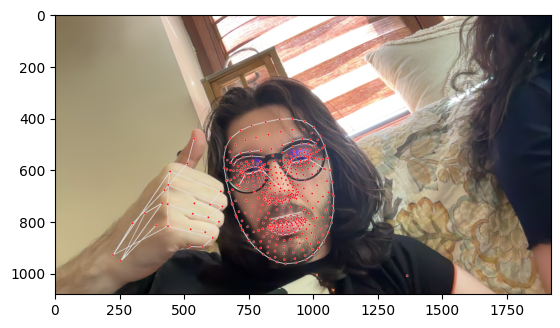

In [27]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [ ]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
#     if results.face_landmarks 
#     else np.zeros(1404)


In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [28]:
result_test = extract_keypoints(results)

In [ ]:
for res in result_test:
    print(res)

0.45389455556869507
0.6230155825614929
-1.0063616037368774
0.9997178316116333
0.47475308179855347
0.5311893820762634
-0.9367538094520569
0.9996178150177002
0.494519978761673
0.5234025120735168
-0.9368127584457397
0.9995300769805908
0.5105408430099487
0.5184663534164429
-0.9370914697647095
0.9995248317718506
0.41629841923713684
0.556948184967041
-0.9310952425003052
0.9996207356452942
0.3984963297843933
0.5651716589927673
-0.9303621053695679
0.9995613098144531
0.3835963010787964
0.5720279812812805
-0.9305093884468079
0.9996530413627625
0.5411495566368103
0.5532202124595642
-0.48573943972587585
0.999424159526825
0.37001121044158936
0.6125144958496094
-0.43369054794311523
0.9997090101242065
0.49965426325798035
0.7059988379478455
-0.8432511687278748
0.9995090961456299
0.43320778012275696
0.7332373857498169
-0.8293110132217407
0.9995486736297607
0.7086719274520874
0.9343324899673462
-0.23618383705615997
0.9947136640548706
0.2719796597957611
1.003828525543213
-0.2491801530122757
0.99587690830

: 

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

array([ 0.52785933,  0.72228831, -1.11244094, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [ ]:
# for action in actions: 
#     # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(1,no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
#         except:
#             pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(start_folder, start_folder+no_sequences):
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(500)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [6]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [27]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [8]:
np.array(sequences).shape

(90, 30, 1662)

In [9]:
np.array(labels).shape

(90,)

In [28]:
X = np.array(sequences)

In [11]:
X.shape

(90, 30, 1662)

In [31]:
y = to_categorical(labels).astype(int)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [14]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [12]:
import tensorflow
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import TensorBoard

In [13]:
log_dir = os.path.join('Logs')
# tb_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir)

In [21]:
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(tensorflow.keras.layers.LSTM(128, return_sequences=True, activation='relu'))
model.add(tensorflow.keras.layers.LSTM(64, return_sequences=False, activation='relu'))
model.add(tensorflow.keras.layers.Dense(64, activation='relu'))
model.add(tensorflow.keras.layers.Dense(32, activation='relu'))
model.add(tensorflow.keras.layers.Dense(actions.shape[0], activation='softmax'))

In [22]:
actions.shape[0]

3

In [23]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test), verbose=1) # callbacks=[tb_callback]

Epoch 1/1000
2/2 [==============================] - 0s 63ms/step - loss: 1.0235 - categorical_accuracy: 0.6000 - val_loss: 1.0270 - val_categorical_accuracy: 0.4000
Epoch 2/1000
2/2 [==============================] - 0s 51ms/step - loss: 1.0910 - categorical_accuracy: 0.5412 - val_loss: 1.1036 - val_categorical_accuracy: 0.4000
Epoch 3/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.7799 - categorical_accuracy: 0.6000 - val_loss: 2.0466 - val_categorical_accuracy: 0.4000
Epoch 4/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.8440 - categorical_accuracy: 0.5765 - val_loss: 0.9736 - val_categorical_accuracy: 0.4000
Epoch 5/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.6924 - categorical_accuracy: 0.6353 - val_loss: 2.7611 - val_categorical_accuracy: 0.2000
Epoch 6/1000
2/2 [==============================] - 0s 54ms/step - loss: 1.2720 - categorical_accuracy: 0.5294 - val_loss: 0.9500 - val_categorical_accuracy: 0.4000
Epoch 7/10

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

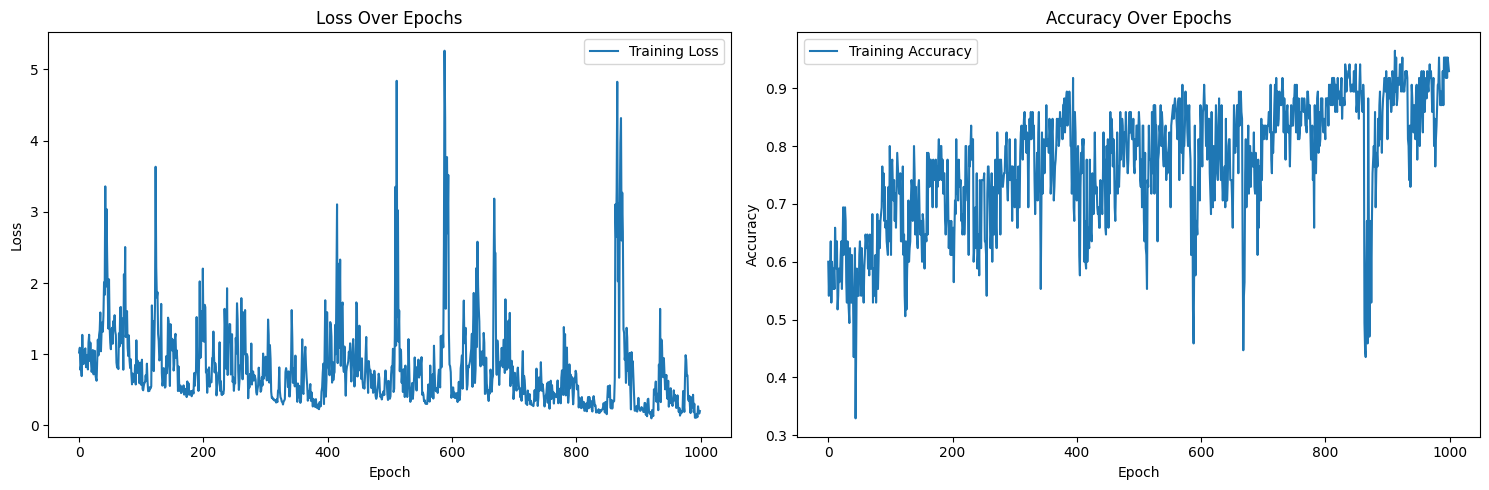

In [36]:
model.summary()

#plot the loss and accuracy curves
import matplotlib.pyplot as plt

# Get training history from the model
history = model.history.history

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
ax1.plot(history['loss'], label='Training Loss')
ax1.set_title('Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(history['categorical_accuracy'], label='Training Accuracy')
ax2.set_title('Accuracy Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

# 8. Make Predictions

In [28]:
res = model.predict(X_test)

1/1 [==============================] - 0s 143ms/step


In [29]:
actions[np.argmax(res[4])]

'thanks'

In [30]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [31]:
# del model

In [32]:
model.load_weights('holistic.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [33]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [34]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 14ms/step


In [35]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [36]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]]])

In [37]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [ ]:
from scipy import stats

In [38]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [18]:
from keras.models import load_model

loadedModel = load_model('holistic.h5')

TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 30, 1662], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_layer_3'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [39]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        print(keypoints)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1745232122.523715  588596 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M3 Max
W0000 00:00:1745232122.584617  651732 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745232122.594534  651732 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745232122.595693  651747 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745232122.595799  651746 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745232122.595970  651743 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

<class 'mediapipe.python.solution_base.SolutionOutputs'>
[ 0.59351152  0.68873179 -2.051368   ...  0.          0.
  0.        ]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[ 0.59288388  0.68874544 -2.13651347 ...  0.          0.
  0.        ]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[ 0.5911094   0.68876284 -2.12898493 ...  0.          0.
  0.        ]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[ 0.59039706  0.68938905 -2.16789031 ...  0.          0.
  0.        ]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[ 0.59020609  0.69133198 -1.94978285 ...  0.          0.
  0.        ]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[ 0.58995938  0.69115227 -1.98604965 ...  0.          0.
  0.        ]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[ 0.58989757  0.69138277 -2.10000658 ...  0.          0.
  0.        ]
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[ 0.58939338  0.69152135 -2.09665346 ...  0.   

KeyboardInterrupt: 

In [2]:
import pickle

filename = "./holistic.pkl"
pickle.dump(model, open(filename, 'wb'))
# model.save("holistic.h5")

NameError: name 'model' is not defined

In [ ]:
import coremltools as ct
from coremltools.models.neural_network import quantization_utils


model.save('holistic_savedmodel')

# Then convert the SavedModel directory
mlmodel = ct.convert(
    'holistic_savedmodel', 
    convert_to="neuralnetwork",
    inputs=[ct.TensorType(shape=(1, 30, 1662))]
)
quantized_model = quantization_utils.quantize_weights(mlmodel, 8)

quantized_model.save('holistic.mlmodel')

Converting TF Frontend ==> MIL Ops: 100%|██████████| 14/14 [00:00<00:00, 105422.36 ops/s]
Input ls elem type unknown. Override with <class 'coremltools.converters.mil.mil.types.type_tensor.tensor.<locals>.tensor'>
Converting TF Frontend ==> MIL Ops: 100%|██████████| 14/14 [00:00<00:00, 71176.07 ops/s]
Input ls elem type unknown. Override with <class 'coremltools.converters.mil.mil.types.type_tensor.tensor.<locals>.tensor'>
Converting TF Frontend ==> MIL Ops: 100%|██████████| 44/44 [00:00<00:00, 13300.86 ops/s]
Saving value type of int64 into a builtin type of int32, might lose precision!
Saving value type of int64 into a builtin type of int32, might lose precision!
Converting TF Frontend ==> MIL Ops: 100%|██████████| 14/14 [00:00<00:00, 67339.74 ops/s]
Input ls elem type unknown. Override with <class 'coremltools.converters.mil.mil.types.type_tensor.tensor.<locals>.tensor'>
Converting TF Frontend ==> MIL Ops: 100%|██████████| 14/14 [00:00<00:00, 72226.64 ops/s]
Input ls elem type unkno

Quantizing using linear quantization
Optimizing Neural Network before Quantization:
Finished optimizing network. Quantizing neural network..
Quantizing layer StatefulPartitionedCall/sequential_1/lstm_5/TensorArrayV2_1 of type loadConstantND
Quantizing layer tf_make_list_0 of type loadConstantND
Quantizing layer range_1d_0 of type loadConstantND
Quantizing layer tf_make_list_0_value_elem_shape of type loadConstantND
Quantizing layer tf_make_list_0_condition of type branch
Optimizing Neural Network before Quantization:
Finished optimizing network. Quantizing neural network..
Optimizing Neural Network before Quantization:
Finished optimizing network. Quantizing neural network..
Quantizing layer StatefulPartitionedCall/sequential_1/lstm_3/TensorArrayV2_1 of type loadConstantND
Quantizing layer StatefulPartitionedCall/sequential_1/lstm_3/time of type loadConstantND
Quantizing layer StatefulPartitionedCall/sequential_1/lstm_3/zeros of type loadConstantND
Quantizing layer StatefulPartitionedC

: 